## Chapter 2: Regression
The first full fledged machine learning example will leverage housing data to predict price values.  This is a traditional example of regression to predict a property value from its attributes.  The dataset is labeled and the prediction is the actual value of the home, thus category is set by the scenario.  The dataset was provided by the author for Hands on with Machine Learning.  This is an end to end ML project.

### Imports for Data load
Using the standard library the author identified the data location on GitHub and extracts and pulls down the dataset.  This is conducted via a function, which is a common approach when a datafile is periodically updated, and there is a need to check for new data, and update the reference file.  

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#### Function to Fetch housing data from GitHub

In [3]:
def fetch_housing_data (housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# fetch_housing_data()

#### Load the data into a Frame
Load up the data into a pandas DataFrame and begin the process of updating the datatypes and informatino associated with the data to improve the overall memory management and data evaluation prior to modeling.

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot data
To get a better understanding of the dataset it is oftent advatageous to plot the information in the dataframe. There are many different ways to plot data, but the easiest by far is the plot the entire Frame.  The hist method will show the distribution of any numerical column, which the plot method will show a trend versus the index (may or may not make sense with non time based data).

In [11]:
import matplotlib.pyplot as plt

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


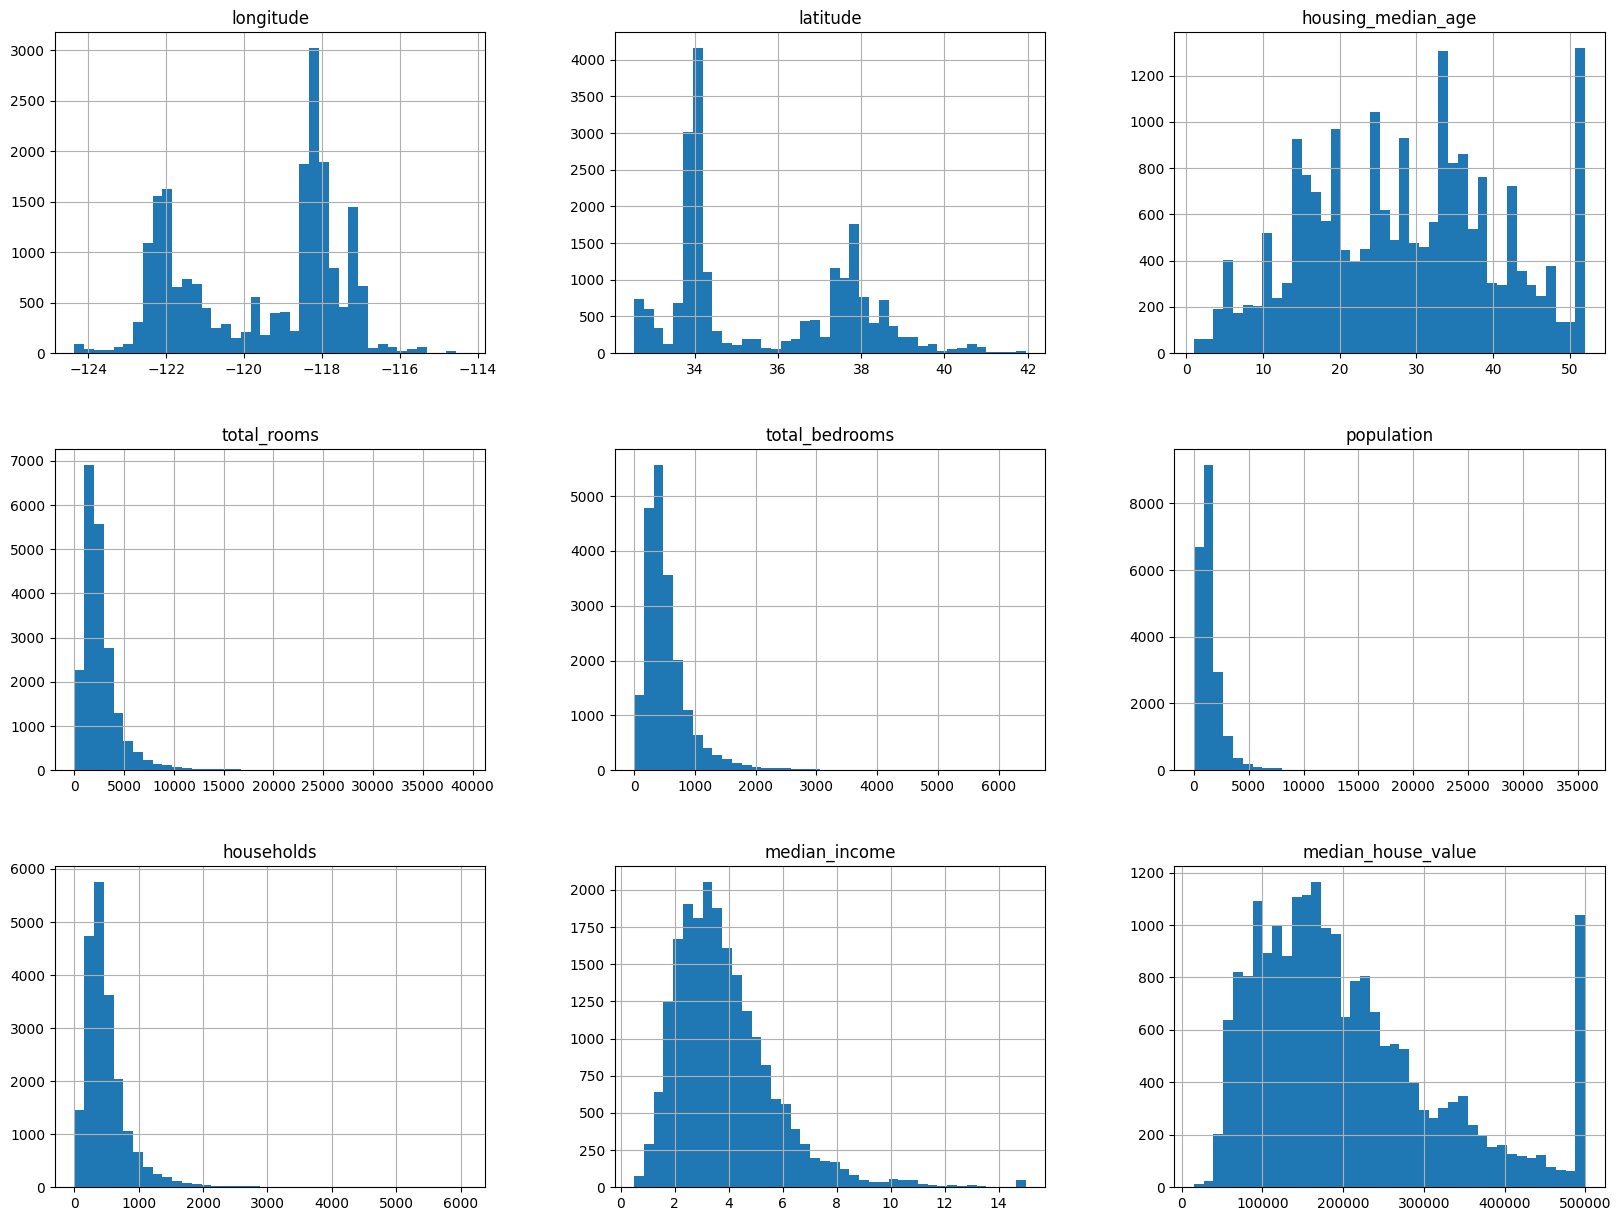

In [12]:
housing.hist(bins=40, figsize=(20,15));

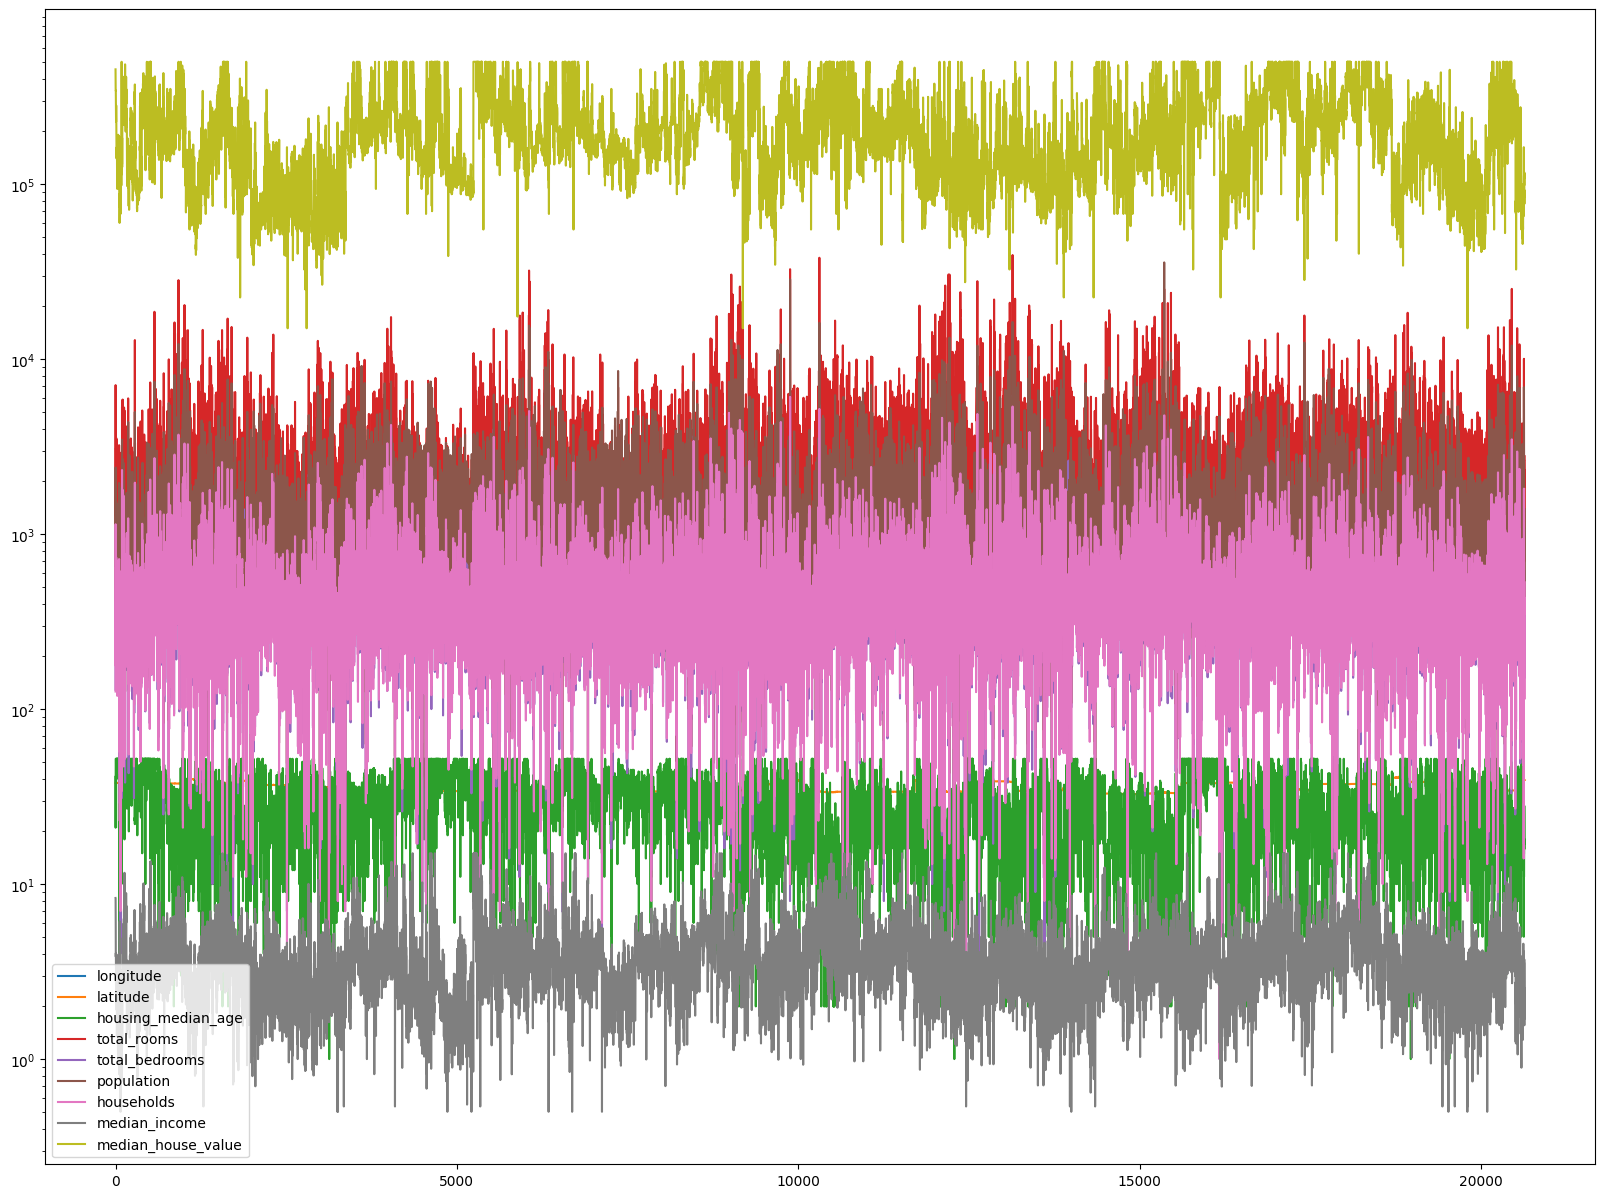

In [13]:
housing.iloc[:,:].plot(figsize=(20,15))
plt.yscale('log')
plt.show();

>**NOTE**: There are capped values in the median house age and median house value.  This is apparent in both plots.  In the histogram the last bin has a large value, and in the plot the data has a flat top profile.  This will need to be addressed to avoid inaccurate model fitting (i.e. no price should exceed \\$ value)

### Create Test Set
Before progressing any further, the data must be split to create a test set.  This will minimize any potential for the model selection or evaluation process to be affected by the datascientists biases when looking through the data.  While this may seem extreme, there are many examples of models being underevaluated due the datascientist expecting a certain answer.

In [14]:
import numpy as np

In [15]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)

In [17]:
len(train_set), len(test_set)

(16512, 4128)

#### Conderations for operationalizing
This works, but only if the data is static and only if you run the selection once.  If you run the function again, you get a different permutation meaning different training data.  If time is infinite, you will eventually see all the data.  If more data is added to the dataset, this will also break the random seed option in numpy.

In [18]:
# To address this, a hash is added, then an id is used to keep the old data sorted when adding new data
from zlib import crc32

In [19]:
def test_set_check(indentifier, test_ratio):
    '''Returns Boolean comparison of the hashed identifier value (unique ID)'''
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32

In [20]:
# this takes hash check function and splits the dataset to minimize the potential for data leakage.
def split_train_test_by_id(data, test_ratio, id_column):
    '''Returns two dataframes, for train and test respectively based on the created Boolean Series in_test_set'''
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [21]:
# housing data has no id column, so we will reset the index and use the monoincrementing default index
# the dataframe actually loaded with an index, so it was moved over to create a unique column
housing_with_id = housing.reset_index()
housing_with_id.head(2)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [22]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

#### More considerations
This works, but all new data would need to be appended to the end of the dataframe so the data does in the monolithically incramenting index doesn't get overwritten.  Another option is to use attributes/features which are relatively stable to create the unique ID for the dataframe.  In this example, the lat and long are nice features to use for just such a process.  Here, an ID column is created to take the value of the lat and long as the basis for the ID.

In [23]:
housing_with_id['id'] = housing.longitude *1000 + housing.latitude
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [24]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

#### Open Source Libraries
There are a number of open source machine learning libraries which will support this process without having to create custum functions.  There have their limitations, but for evaluation of models in an exploration phase, they are quick to set up and easy to run.  The Scikit Learn library is the example be covered below for train, test, split processing in advance on a dataset.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Ensuring sample distribution
For large sample sets, the use of random sampling is relatively safe for a split. If the sample size gets relatively small, the potential for bias in the data is a problem.  To avoid this steps must be taken to identify a way to validate that the training set is representative of the whole sample population available.  

In the housing data, median income is identified as a key element in housing price points for a given geographic area.  This means it is critical that the median income distribution split for training and testing is representative of the larger population of the sample.  To determine this we leverage the entire sample and determine the overall distribution which is leveraged for the split for modeling.  The pd.cut() method will be used to determine the approapriate number of categories for median income which is a continuous number.

In [27]:
housing['income_cat'] = pd.cut(housing.median_income,
                              bins=[0,1.5,3.0,4.5,6.0,np.inf],
                              labels=[1,2,3,4,5])

<Axes: >

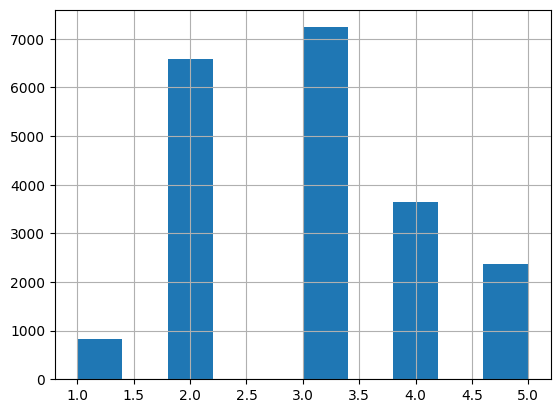

In [28]:
housing.income_cat.hist()

##### Comparing distributions
Having created the category for median income, another sci-kit learn function can be leveraged to create a stratified train and test set output.  The aptley named StratifiedShuffleSplit class does just this for the train, test, split process.

The comparison dataframe shows the difference in the distribution of random versus stratified splits on the resultant test set data.

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [31]:
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [32]:
train_index

array([12655, 15502,  2908, ..., 19263, 19140, 19773], dtype=int64)

In [33]:
def strat_split(data, strat_col):
    '''Pass data and return stratified train and test sets matching the original sample distribution'''
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(data, strat_col):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    for set_ in (strat_train_set, strat_test_set):
        set_.drop(strat_col, axis=1, inplace=True)
    return strat_train_set, strat_test_set

In [34]:
strat_test_set.income_cat.value_counts(normalize=True)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64

In [35]:
(pd.concat([strat_test_set.income_cat.value_counts(normalize=True),
         housing.income_cat.value_counts(normalize=True),
          pd.cut(test_set.median_income,bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5]).value_counts(normalize=True)],
          axis=1, keys=['Strat test set', 'Full Sample', 'Random Sample'])
 .assign(rand_err = lambda df: 100*(df['Random Sample']-df['Full Sample'])/df['Full Sample'],
         strat_err = lambda df: 100*(df['Strat test set']-df['Full Sample'])/df['Full Sample'])
 .sort_index()
 .style
 .background_gradient(axis=0, cmap='RdBu', subset=['rand_err','strat_err'], vmin=-7, vmax=3)
 .set_caption('Stratified Test Set Comparison')
)

,Strat test set,Full Sample,Random Sample,rand_err,strat_err
1,0.039971,0.039826,0.040213,0.973236,0.364964
2,0.318798,0.318847,0.324370,1.732260,-0.015195
3,0.350533,0.350581,0.358527,2.266446,-0.013820
4,0.176357,0.176308,0.167393,-5.056334,0.027480
5,0.114341,0.114438,0.109496,-4.318374,-0.084674


In [36]:
(pd.concat([strat_train_set.income_cat.value_counts(normalize=True),
         housing.income_cat.value_counts(normalize=True),
          pd.cut(test_set.median_income,bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5]).value_counts(normalize=True)],
          axis=1, keys=['Strat train set', 'Full Sample', 'Random Sample'])
 .assign(rand_err = lambda df: 100*(df['Random Sample']-df['Full Sample'])/df['Full Sample'],
         strat_err = lambda df: 100*(df['Strat train set']-df['Full Sample'])/df['Full Sample'])
  .sort_index()
 .style
 .background_gradient(axis=0, cmap='RdBu', subset=['rand_err','strat_err'], vmin=-7, vmax=3)
 .set_caption('Stratified Train Set Comparison')
)

,Strat train set,Full Sample,Random Sample,rand_err,strat_err
1,0.039789,0.039826,0.040213,0.973236,-0.091241
2,0.318859,0.318847,0.324370,1.732260,0.003799
3,0.350594,0.350581,0.358527,2.266446,0.003455
4,0.176296,0.176308,0.167393,-5.056334,-0.006870
5,0.114462,0.114438,0.109496,-4.318374,0.021169


>**NOTE**: Now that the data has been stratified correctly in the training and test split, the income_cat column can be removed from the original dataset.

In [37]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Explore and Visualize the data to gain Insights
This is an important steps in gaining a better understanding of the data available for the model development.  It will allow the user a better understanding of the data being manipulated for the modeling process.  The reason the data was split is to ensure that exploration didn't bias because the test set data was included. Hence, all of the analysis will use the training set throughout the visualization.  There are instances where even the training set can be quite large, and a smaller exploration set is helpful in allowing faster manipulation.

In [38]:
housing = strat_train_set.copy()

#### Visualizing Geographic data
When the data has lat and long data available, this can be leveraged to gain some understanding of where. Generally this can be done with a scatter plot as the matplotlib library will easily plot the points to gain insight.  That said, there are geolocation friendly libraries for mapping which can further augment this process if there is interest in a better understanding of the location.

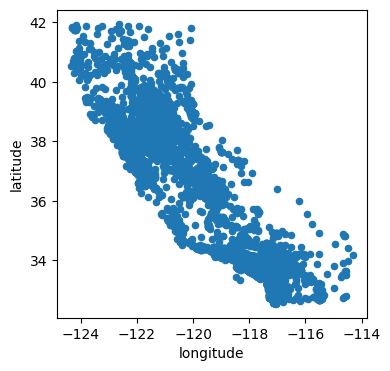

In [39]:
# a simple base plot, but it will need more
(housing
 .plot
 .scatter(x='longitude',y='latitude', figsize=(4,4))
);

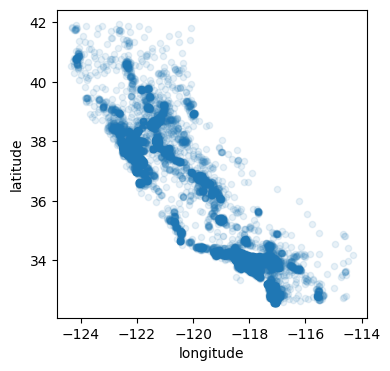

In [40]:
# a simple base plot, but it will need more
# alpha shows some indication of density, but still limited
(housing
 .plot
 .scatter(x='longitude',y='latitude', alpha=0.1 ,figsize=(4,4))
);

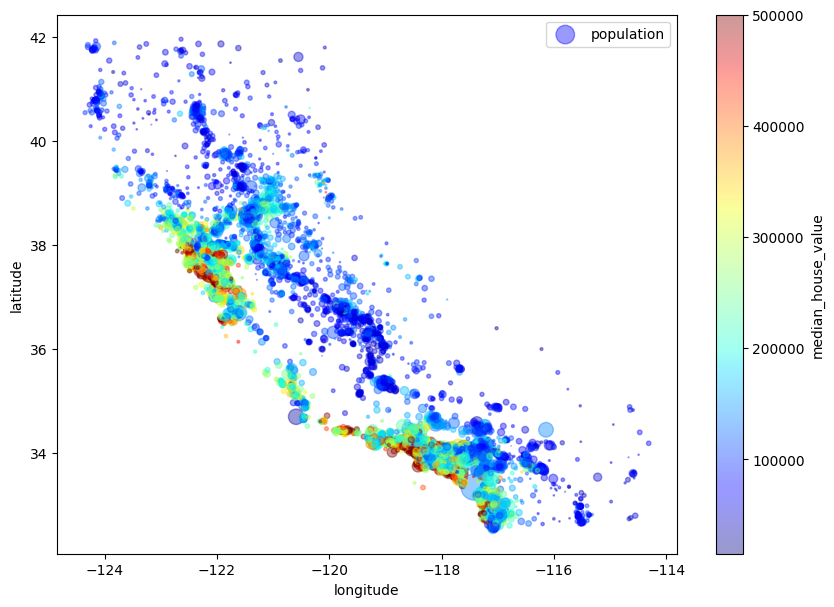

In [41]:
# a simple base plot, but it will need more
# Adding signficantly more encoding
(housing
 .plot
 .scatter(x='longitude',y='latitude', alpha=0.4 ,
          s=housing['population']/100 , label='population', figsize=(10,7),
          c='median_house_value', cmap='jet', colorbar=True)
)
plt.legend()
plt.show()

#### Initial Findings
There is a home value correlation to the combination of population density and distance to the ocean.  While there are some northern california coastal districs that are less expensive the plot gives a good idea of the shape/pattern of the median home value in the state of california.

## Looking for correlations
Correlations are a unique relationship between existing features in a dataset.  Does home value move with population density?  It seems to be the case, but how strongly correlated are the two features.  Since this dataset is relatively small, the *Pearson's* or *Standard correlation coefficient* can be determined for every pair of attributes/features in the dataset.  Pandas has a handy function to do just this concept.

In [42]:
corr_matrix = housing.corr(numeric_only=True)

In [43]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [44]:
attributes = corr_matrix.median_house_value.sort_values(ascending=False).iloc[:4].index
attributes

Index(['median_house_value', 'median_income', 'total_rooms',
       'housing_median_age'],
      dtype='object')

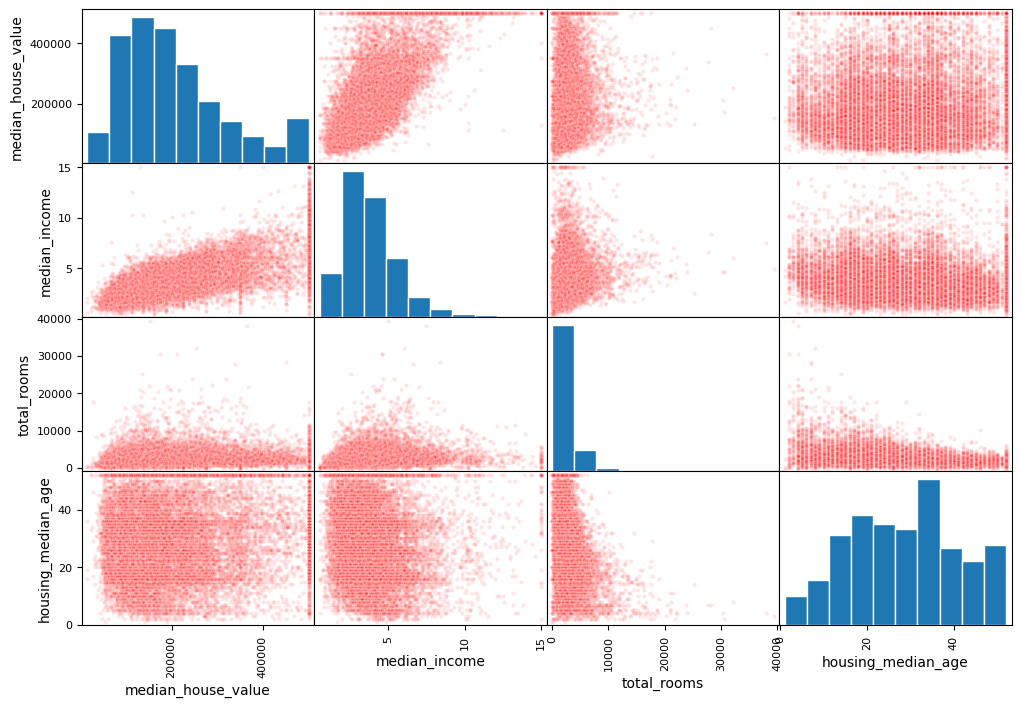

In [45]:
pd.plotting.scatter_matrix((housing[attributes]), figsize=(12,8), alpha=0.1, c='red', edgecolor='white',
                          hist_kwds={'edgecolor':'white'})
plt.show()

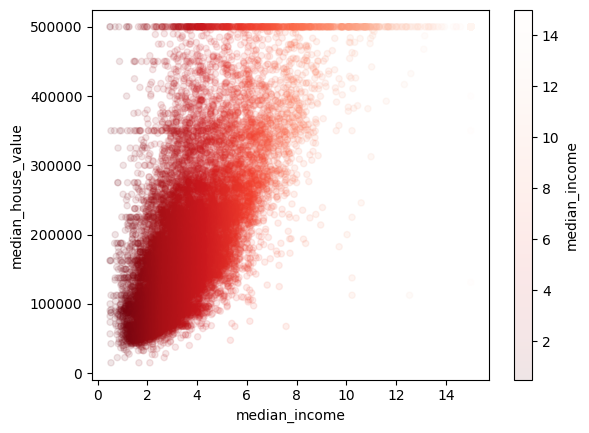

In [46]:
# extracting away median home value and median income, notice the lines in the data.  Probably need to clean
(housing
 .plot
 .scatter(x='median_income', y='median_house_value', alpha=0.1, c='median_income',cmap='Reds_r')
);

#### Experimenting with attribute combinations
An addition step is working to combine attributes, sometimes called feature engineering, to determine if they influence the target variable more than the raw format.  For this particular dataset, there are a number of features which are based on the aggregate per district, which is not as useful as a per home basis statistic.  Here, we can create the updated statistics and determine the correlation with the target variable for use in a model.

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [48]:
(housing
 .assign(rooms_per_household = lambda df_:df_.total_rooms/df_.households,
         bedrooms_per_household = lambda df_:df_.total_bedrooms/df_.households,
         bedrooms_per_room = lambda df_:df_.total_bedrooms/df_.total_rooms,
         population_per_household = lambda df_:df_.population/df_.households)
 .corr(numeric_only=True)
 .median_income
 .sort_values(ascending=False)
)

median_income               1.000000
median_house_value          0.687151
rooms_per_household         0.311528
total_rooms                 0.200133
population_per_household    0.021815
households                  0.010869
population                  0.002421
total_bedrooms             -0.009643
longitude                  -0.019615
bedrooms_per_household     -0.058923
latitude                   -0.075146
housing_median_age         -0.111315
bedrooms_per_room          -0.624650
Name: median_income, dtype: float64

>**Notable**: Two of the added features, bedrooms_per_room and rooms_per_household are more impactful than the original aggregates.  The Dataframe should be updated to incorporate these new features for the modeling process.

In [49]:
housing = (housing
 .assign(rooms_per_household = lambda df_:df_.total_rooms/df_.households,
         bedrooms_per_room = lambda df_:df_.total_bedrooms/df_.total_rooms)
)

In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692


## Prepare the Data for Machine Learning
This is a process that requires the data scientist to create a group of transformations which can consistently be applied to the dataset.  In this case, the targeted outcome is an operationalized set of functions which can taken in new data, prepare it and push it into the machine learning algorithim to update the model.  Because of the need to repeated ingest new data, it is recommended that the data process is conducted via functions versus manual steps.

Initially, the data set needs to be reset to its normal ingestion point format to ensure new data will look the same as the basis being trasnformed when developing functions.

In [51]:
housing = strat_train_set.drop('median_house_value', axis=1) # drop creates a copy
housing_labels = strat_train_set.median_house_value.copy() # creating target label set

#### Data Cleaning
The process of cleaning data make take up a disproportionate amount of the overall machine learning effort.  As seen in the exploration, the dataset has opportunities to be cleaned up in preparation for application in a machine learning algorithim. Machine learning algorithms cannot handle missing features/data, and so decisions will need to be made around how to handle these challenges.  Generally this will fall into three categories:
1. Get Rid of the corresponding data (districts in this case)
2. Get rid of the whole attribute (entire field)
3. Set or fill the value in some way (zero, mean, median)

In [52]:
housing.dropna(subset=["total_bedrooms"]) # Option 1
housing.drop("total_bedrooms", axis=1)    # Option 2

median = housing.total_bedrooms.median()  # Option 3
housing.total_bedrooms.fillna(median, inplace=True)

### Scikit-Learn
Scikit-Learn or sklearn provides some nice classes to take care of this sort of work as part of its pipeline process.  In this particular case, the SimpleImputer class will walk your data and handle missing data in the way specified.  In this instance, the median will be applied for missing total_bedrooms data, which provides a good estimate of where the value may actually fall. 

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
imputer = SimpleImputer(strategy='median')

In [55]:
# Imputer only works on numeric data
housing_num = (housing
 .select_dtypes("number")
)

In [56]:
# fit the imputer to the data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [57]:
# imputer has calculated the median for each column
imputer.statistics_ == housing_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [58]:
# apply the "trained" to your data with a transform call, yields numpy array
X = imputer.transform(housing_num)

In [59]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [60]:
# all data populated in the dataset
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Categorical data Encoding
Machine learning algorithms do not generally like text. Because of this and the additional performance attributes associated with memory and run time, it is common to convert categorical data into numeric equivalent.  To demonstrate this process, the ocean proximity column will be converted using both Ordinal encoding and One Hot encoding. 
- **Ordinan encoding**: Should be used when the data is in order (i.e. ordinal).  This is because the model will assume number representations near each other (e.g. 1 and 2) are similar.  This may not be the case for categorical data.
- **One Hot encoding**: This is for non releated categories (e.g. colors) or data which is not in order.  In both cases the data is converted into a sparse matrix where there is a attribute (column) created for each value, and the record gets a 1 encoded to only the value it contains, with zeros everywhere else.  Similar to text vectorization for NLP.  The sparse matrix will only have a value in the hot column with all other being null for storage management.

In [61]:
# categorical column interogation, there are only four values, but not in order
housing_cat = housing[['ocean_proximity']]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

---
#### Ordinal encoding

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
ordinal_encoder = OrdinalEncoder() # instaniate the tranformer
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [64]:
ordinal_encoder.categories_ # category order from 0 to 4.  0 and 4 are similar, while 0 and 1 are not.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> **NOTE**: As stated earlier, this will lead the model to assume 0 and 1 are similar, but they are not, and thus they are not truly ordinal in nature.

---
#### OneHot encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [67]:
housing_cat_1hot # returns sparse matrix, but not viewable.  Better memory performance.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [68]:
# to see the data
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [69]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### OneHot Encoding continued
OneHot encoding is a memory hog.  In this particular case, it is a viable option with only five columns of data being added in place of the original categorical vector.  If the data had more categories, this could become problematic taking up lots of space.  Common examples might be country codes, proffesions or species.  In these cases, a better option might be to convert the data from a category to a numeric value. Ocean proximity could be converted to distance to the ocean based on gps lat and long. Country code could be replaced with GDP per capita or population.  Alternatively, you could replace each category with a learnable low dimension vector called and embedding.

### Custom Transformers
Although Sci-Kit Learn has many transformers they are general in nature.  To avoid intermediate state creation and memory issues in production, it is common to create custom transformers for the model development preprocessing steps.  This also allows some built in allowance for A/B testing.  The transformers will need to work seemlessly with Sci-Kit learn to ensure the existing pieces of infrastructure are interoperable.  

An example custom transformer is shown below leveraging Sci-Kit Learn infrastructure in its development.  This adds the combined attributes just demonstrated through the prior steps in this chapter.  In it, the bedrooms per room, population per household, and rooms per household are added, with an option on the bedrooms per room.  This takes the raw housing dataframe and conducts the transformations.  It is still missing the calls for Imputer and OneHot encoding.

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

---
#### Class for Stratified Train Test Sample
This is difficult, because technically the entire sample must be stratified, split, and then broken into numeric and categorical data to further progress through the pipeline.  In reality, this would need to be done first, then dtypes subdivided, followed by the numeric transformation, and finally the column transformer.

In [71]:
class StratifiedSplit(BaseEstimator, TransformerMixin):
    '''Split into test and training sets with the same distribution as the total sample to avoid 
    unintentional biases in the training data'''
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self # nothing else required
    def tranform(self, X, strat_col):
        split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        for train_index, test_index in split.split(X, strat_col):
            strat_train_set = X.iloc[train_index].copy()
            strat_test_set = X.iloc[test_index].copy()
        for set_ in (strat_train_set, strat_test_set):
            set_.drop(strat_col.name, axis=1, inplace=True)
        return strat_train_set, strat_test_set

In [72]:
# added back to demo
housing['income_cat'] = pd.cut(housing.median_income,
                              bins=[0,1.5,3.0,4.5,6.0,np.inf],
                              labels=[1,2,3,4,5])

In [73]:
splitter = StratifiedSplit()

In [74]:
splitter.tranform(housing, housing.income_cat)[0].head() # first return [0 index] is the training set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3465,-118.46,34.31,24.0,2920.0,601.0,1460.0,598.0,4.2708,<1H OCEAN
15290,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282,NEAR OCEAN
10779,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222,<1H OCEAN
14038,-117.14,32.75,37.0,1832.0,525.0,955.0,488.0,2.7852,NEAR OCEAN
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143,INLAND


---
#### Adding numeric attributes
This will be combined into a single class with the BaseEstimator and TransformerMixin from Sci_kit Learn to incorporate into a pipeline.  Here the indexes are needed for the slicing operations in the class call.  This is not the ideal approach as a change in the datastructure would destroy the transformation.

In [75]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # column index numbers for slicing

In [76]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    '''Add attributes for rooms per household, population per household and bedrooms per room (if selected)'''
    def __init__(self, add_bedrooms_per_room=True): # no *arg or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothine else required
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix]/ X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [77]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [78]:
housing_extra_attribs = attr_adder.transform(housing.values) # strip indexes feed np array

In [79]:
(pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+['rooms_per_house','pop_per_house']))
# casting result to dataframe for inspection

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house,pop_per_house
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.09,<1H OCEAN,4,6.658342,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2,5.571932,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3,4.110465,2.662791
16510,-122.7,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3,6.297405,2.411178


### Feature Scaling
One of the most important transformations when conducting algorithms is feature scaling.  Generally speaking, the algorithms perform poorly when the features are across very different scales.  This is a common problem in datasets, and the housing dataset is no exception.  The rooms range from 6-39,320 and the median income is 0-15.  Very different scales.  

**There are two primary scaling methods.  MinMax scaling and Standardization scaling.**

Minmax scales within the range for the feature, and is also called normalization.  This type of scaling is the simplest.  Values are shifted and rescaled so all values fall between 0 and 1.  Sci_kit learn has a feature called *MinMaxScaler* which facilitates this transformation.  This is done by subtracting the min value and dividing by the range of values (max-min).  $$Normalized = \frac{val-min}{max-min}$$

Standardization is a different approach.  Rather than use the relative offset and range, it subtracts the mean resulting in a tranformed vector with a mean of zero.  It then divides by the standard deviation so that the resulting vector has a distribution of one unit variance. $$standardized = \frac{val-mean}{std}$$  This does not bound the values to a specific 0-1 range.  Some Deep learning neural networks will struggle if the values are outside of 0-1.  On the other hand, standardization is much less impacted by outliers. So it is generally a better fit for traditional algorithms.  Sci-Kit learn provides a transformer for this process call *StandardScaler*.

---
### Transformation Pipeline
There are a number of transformations required for data preparation to facilitate machine learning applications.  Up to this point, the efforts have been exploratory in nature, and intermediate state evaluation was helpful in understanding the effects the transformations are having on the data set.  To effectively manage all these transformations in production, it is prudents to create a pipeline.  Sci-Kit Learns has just such a class to facilitate this process and allow the data to be walked through a number of transformations.  **This highlights the need for custom transformations to work with Sci-Kit learns API effectively, or the pipelines will not work**.  Here the process is demonstrated for the housing data to facilitate the numeric transformation, followed by a second pipeline to bring together the numeric and categorical transformation.

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### Instantiate the Pipeline
Here, the pipeline is instantiated with the transformations provided in the order expected.  This is a numeric data trasnformation, and as such it is only being leveraged for the non text/category data.  This means when it is called, it will only evaluated the numeric information.  It should be noted that all but the last call in a pipeline must have a fit_transform method to facilitate the pipeline process.  The last can also be a transform, but could also be a call for a model algorithm depending on the scenario.  

The order of operations is the following:
- Missing data transformation
- Addition of features
- Scaling of the resultant data for modeling

In [81]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()), # custom transformer
    ('std_scaler', StandardScaler())
])

In [82]:
housing_num.info() # it appears this data has already been filled, so imputer won't need to do much

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [83]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [84]:
housing_num_tr[:3] # remember, this returns an array, not a dataframe.  And all data is scaled

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252]])

#### Column Transformer
This is a new attribute in the Sci_Kit learn system.  It allows transformation of numeric and categorical data concurrently versus having to segragate this work.  Now the entire pipeline can be combined to facilitate data preparation for different types.  It is not exactly concurrent, but it does allow the data to be passed with transform type applied.  

**SYNTAX**:
It requires a tuple which specifies the name, transformer, and specific columns to apply the transformation against.  Passing imputer to a categorical column isn't much help.

In [85]:
from sklearn.compose import ColumnTransformer

In [86]:
num_attributes = list(housing_num) # extracts the column names.  Handy to know.
cat_attributes = ['ocean_proximity']

In [87]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes)
])

In [88]:
housing = strat_train_set.drop('median_house_value', axis=1) # drop creates a copy
housing_labels = strat_train_set.median_house_value.copy() # creating target label set

In [89]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [90]:
housing_prepared = full_pipeline.fit_transform(housing)

In [91]:
housing_prepared[:3] # resultant ML ready array for pattern analysis

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]])

In [92]:
(pd.DataFrame(housing_prepared,columns=list(housing.columns)+['rooms_per_household','pop_per_household','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])
).info()# resultant ML ready array for pattern analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          16512 non-null  float64
 4   total_bedrooms       16512 non-null  float64
 5   population           16512 non-null  float64
 6   households           16512 non-null  float64
 7   median_income        16512 non-null  float64
 8   ocean_proximity      16512 non-null  float64
 9   rooms_per_household  16512 non-null  float64
 10  pop_per_household    16512 non-null  float64
 11  <1H OCEAN            16512 non-null  float64
 12  INLAND               16512 non-null  float64
 13  ISLAND               16512 non-null  float64
 14  NEAR BAY             16512 non-null  float64
 15  NEAR OCEAN           16512 non-null 

---
### Select and Train a Model
After preparing the data, it is time to select and train a machine learning model.  While the preparation phase has been completed for this first round, model tuning will forace a return to this preparation to tweak or add features as the model is tuned.  In general, model selection and training go hand in hand with the data preparation process to help arrive at a performant model.

#### Training and Evaluating on the training data
Starting with a linear regression model to help predict housing costs, the approach it relatively simple.  Import the linear regression algorithm, and fit the model to the data.  Interogate the results (RMSE) to determine the level of model performance both wholistically (accuracy) and across precision and recall (specified error type).  

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lin_reg = LinearRegression() # instantiate the model
lin_reg.fit(housing_prepared, housing_labels) # fit the model to the data

LinearRegression()

In [95]:
# quick prediction test
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


> **NOTE**: Doesn't seem to good.  There is significant variation in the data based on a quick comparison.  Let's do a RMSE.

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions, housing_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

---
#### Try another algorithm - Decision Tree
The decision tree algorithms are capable of finding complex nonlinear relationships in data.  The offer a very user friendly understanding evaluating features to determine if the answer to the target split it yes or no across the feature.  This can be done over and over to a significant depth.  There are best practices regarding depth and number of end nodes/leafs which will be covered in greated detail later.

In [98]:
from sklearn.tree import DecisionTreeRegressor # regression tree

In [99]:
tree_reg = DecisionTreeRegressor() # instantiate the algorithm with default specified parameters/hyperparameters

In [100]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [101]:
housing_predictions = tree_reg.predict(housing_prepared)

In [102]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

>**NOTE**: No Error is not a good thing.  This model is likely completely overfit.  But how can this be confirmed.  This is where breaking up the training set is required.  In most cases the modeling process will use a *training, validation and test set*.  This is done most often using **Cross Validation**

### Better Model Evaluation: Cross-Validation
One way to improve model evaluation and cross check things like overfitting is to create another split in the training data.  This split is used to create a small hidden validation set to check issues like overfitting and general performance consistancy.  This can be done manually with the train_test_split() function, and it would work.  But there is a more robust approach.

Cross Validation can be accomadated using Scit_Kit Learn's K-Fold Cross validation feature.  This is a process where the training data is broken randomly into k folds holding one back for validation.  It does this k times and scores each variation against the fold held out while training on the other k-1 folds.  This is a very robust process for model evaluation. 

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
scores

array([-5.29885136e+09, -5.03091551e+09, -4.64260592e+09, -5.25959512e+09,
       -4.80705737e+09, -6.01035408e+09, -5.01744994e+09, -5.39167232e+09,
       -4.69444578e+09, -5.30510376e+09])

In [105]:
tree_rmse_scores = np.sqrt(-scores) # must invert the value of scores to obtain the sqrt
# this negative score value is a function of the cross validation feature

In [106]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [107]:
display_scores(tree_rmse_scores)

Scores: [72793.20954244 70928.94691999 68136.67085354 72523.06610191
 69332.94579618 77526.47342802 70833.960356   73428.00774842
 68516.02571877 72836.14320206]
Mean: 71685.54496673346
Standard Deviation: 2643.436780858879


>**NOTE**: The model is now showing worse than the prior result since it cannot see all the data.  It actually looks worse than the linear regression model.  Cross validation is great, but it requires the model to be trainined k times, taking compute power to accomplish this feat.  This is not always an option in real world applications. 

#### Cross Val of Lin Regression model
Evaluation of the linear regression model for comparison.  Notice that it performs better on the hidden data meaning a more effective model across unknown datasets.

In [108]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rsme_scores = np.sqrt(-lin_scores)
display_scores(lin_rsme_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.3282098180666


#### Cross Val of RandomForest
Instantiationa and Evaluation of the RandomForest model for comparison.  Random Forest is a model made up of many different smaller DecisionTrees.  Here the individual tree predictions are averaged to help determine the prediction.  This helps to remove overfitting while still achieving better performance.  There are many parameters, but again, this will be conducted with the defaults for demonstration purposes.

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
forest_reg = RandomForestRegressor()

In [111]:
# forest_reg.fit(housing_prepared, housing_labels)

In [112]:
rand_forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rand_forest_rsme_scores = np.sqrt(-rand_forest_scores)
display_scores(rand_forest_rsme_scores)

Scores: [51637.61826525 48983.65080483 46876.74818645 51721.3456916
 47059.64980134 51661.30515838 52447.4534954  49809.06008078
 48799.09351955 53936.6345    ]
Mean: 50293.25595035813
Standard Deviation: 2234.8120720144493


### Saving Model Runs
Because algorithm exploration takes time and effort, it is prudent to save the model evaluations conducted throughout the process.  This should include parameters and results to ensure the outcome can be recreated later if needed.  The best libraries for this are pickle or joblib.  joblib is specifically focused on saving large numpy arrays.

In [113]:
import joblib

In [114]:
joblib.dump(forest_reg, "my_model.pkl")

['my_model.pkl']

In [115]:
my_model_loaded = joblib.load("my_model.pkl")

In [116]:
my_model_loaded.estimator

DecisionTreeRegressor()

## Fine Tuning a Model
Once a short list of models has been established, the effort to fine tune or optimize model performance in terms of both accuracy and speed begins.  What is important here is understanding how a model will be deployed and what sort of compute will be available to facilitate the maintaining the model.  If accuracy is paramount and time is not an issue, focus will be toward tuning the model for that end.  To evaluate the many options available for hyperparameters would take significant time to conduct manually as there are essentially endless combinations which can be pursued.  This is where tools like grid search CV come into play.

### Grid Search
A word of caution, grid search begins to add significant time to training as it will start to multiply iterations the cross validation method must move through due to parameter tuning which is added on top of the original fold process.  In this case it is common to reduce the folds due to the addition of hyperparameter values.  The example below will create the following:
- 3 x 4 = 12 iteration combination for n_estimators and max_features
- 2 x 3 x 1 = 6 iteration combinations for n_estimators and max_features, but this time with the bootstrap as False vs True
- 18 x 5 = 90 iterations based on 12+6 variations and 5 folds.  This is quite a bit more than 10 folds shown previously.

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}
]

In [119]:
forest_reg = RandomForestRegressor()

In [120]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [121]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [122]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [123]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [124]:
cvres = grid_search.cv_results_

In [125]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64310.713876279726 {'max_features': 2, 'n_estimators': 3}
55668.90090025576 {'max_features': 2, 'n_estimators': 10}
52193.376222740124 {'max_features': 2, 'n_estimators': 30}
60937.77542873134 {'max_features': 4, 'n_estimators': 3}
52753.22682595723 {'max_features': 4, 'n_estimators': 10}
50290.43223460868 {'max_features': 4, 'n_estimators': 30}
59606.744271564006 {'max_features': 6, 'n_estimators': 3}
51974.02638392946 {'max_features': 6, 'n_estimators': 10}
50061.89963572296 {'max_features': 6, 'n_estimators': 30}
59071.613037142204 {'max_features': 8, 'n_estimators': 3}
52415.020937696936 {'max_features': 8, 'n_estimators': 10}
50144.46924177683 {'max_features': 8, 'n_estimators': 30}
62085.309761743156 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54261.93000420227 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59812.18777656496 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52385.6209270435 {'bootstrap': False, 'max_features': 3, 'n_estimators

### Randomized Search
Grid Search is fine when exploring a smalled number of features and hyperparameters.  It should be noted that it is an option to include feature evaluation in grid search if, like the add_bedrooms_per_room, they have been included in the pipeline.  It can also be used to determine the best way to handle outliers.  It has limitations if the combinations get large.  In this case, there is an alternative option, **RandomizedSearchCV**.  In this approach, a number of iterations is specified in place of a parameter grid which requires 100% coverage.  

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
from scipy.stats import uniform, loguniform

In [128]:
uniform(10,40).stats() # mean/median and variance

(30.0, 133.33333333333331)

In [129]:
param_dist = [
    {'n_estimators':np.arange(10,40,1),'max_features':np.arange(2,12,1)},
]

In [130]:
rand_search = RandomizedSearchCV(forest_reg,param_dist, 
                                 n_iter=10, scoring="neg_mean_squared_error", 
                                 return_train_score=True)

In [131]:
rand_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [132]:
rand_search.best_params_

{'n_estimators': 37, 'max_features': 9}

In [133]:
rand_search.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=37)

In [134]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

51649.380131882426 {'n_estimators': 15, 'max_features': 11}
51293.746355546056 {'n_estimators': 13, 'max_features': 6}
50799.68956715203 {'n_estimators': 27, 'max_features': 3}
51423.040435848394 {'n_estimators': 18, 'max_features': 4}
50986.81204721442 {'n_estimators': 22, 'max_features': 4}
49830.23218693279 {'n_estimators': 37, 'max_features': 9}
51226.18402809789 {'n_estimators': 16, 'max_features': 10}
51840.90298523721 {'n_estimators': 12, 'max_features': 8}
49898.78753601924 {'n_estimators': 32, 'max_features': 8}
53741.246966649 {'n_estimators': 16, 'max_features': 2}


>**NOTE**: Only slightly improved over the GridSearchCV method with mean error score of \$49,777

### Enselmble methods
Another way to find tune models is the combine the best performers. The group will often perform better than the individual model, indicating the truth in averaging many estimates to determine the real answer.

#### Analyze the Best Models and their Errors
To accomplish the ensembly, the model performance across a host of models must be clearly understood.  Understanding the performance impact of individual attributes can be very helpful in tuning the models.  This is an available attribute of the best_estimator_ attribute.

In [135]:
grid_search.best_estimator_.feature_importances_ # not very helpful without labels

array([7.78770388e-02, 7.03820481e-02, 4.25308725e-02, 1.86673775e-02,
       1.69686263e-02, 1.66914238e-02, 1.58990423e-02, 3.16866969e-01,
       5.48102406e-02, 1.07509784e-01, 8.94941627e-02, 1.77088394e-02,
       1.46798149e-01, 7.73100500e-05, 2.57053692e-03, 5.14757886e-03])

In [136]:
extra_attibs = ['room_per_household','pop_per_household','bedrooms_per_room']

In [137]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attibs + cat_one_hot_attribs

In [138]:
sorted(zip(grid_search.best_estimator_.feature_importances_, attributes), reverse=True)

[(0.316866969218315, 'median_income'),
 (0.14679814906164207, 'INLAND'),
 (0.10750978379362583, 'pop_per_household'),
 (0.0894941626786102, 'bedrooms_per_room'),
 (0.07787703879192731, 'longitude'),
 (0.07038204807835997, 'latitude'),
 (0.054810240626312845, 'room_per_household'),
 (0.04253087252493329, 'housing_median_age'),
 (0.018667377532742516, 'total_rooms'),
 (0.017708839422516123, '<1H OCEAN'),
 (0.016968626260483698, 'total_bedrooms'),
 (0.016691423846091777, 'population'),
 (0.015899042328066555, 'households'),
 (0.005147578861887447, 'NEAR OCEAN'),
 (0.002570536924502861, 'NEAR BAY'),
 (7.731004998265723e-05, 'ISLAND')]

>**NOTE**: Some of the features are having very limited impact.  It might be prudent to drop a number of the ocean proximity columns, as the only one that matters is INLAND.  

## Evaluate the Model on the Test Set
The original data held back when the stratified sample was created should now be used to test the model performance.  There is only one difference between this and the process which was conducted previously; You will not conduct a fit on the test set.  All calls to fit tranform will be transform only options.

In [139]:
final_model = rand_search.best_estimator_

In [140]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [141]:
X_test_prepared = full_pipeline.transform(X_test)

In [142]:
final_predictions = final_model.predict(X_test_prepared)

In [143]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47963.959637482636

In [144]:
# confidence interval to help understand 95% point
from scipy import stats

In [145]:
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45930.7581937 , 49914.40974272])